In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def f_true(x):
    return 0.03 * x ** 4 - 0.4 * x ** 2 + 0.7 * np.sin(2.2 * x)

def make_poly_features(x, degree):
    x = np.asarray(x).reshape(-1, 1)
    X = np.hstack([x ** i for i in range(degree + 1)])
    return X

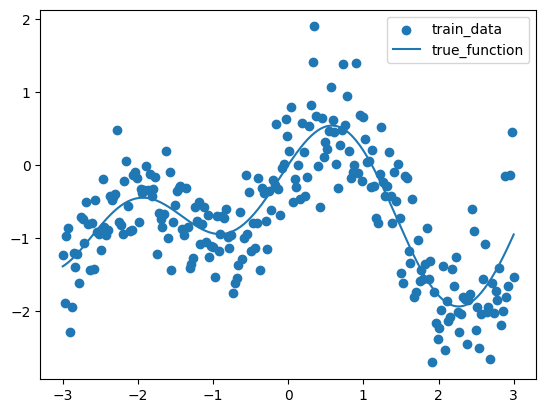

In [3]:
rng = np.random.default_rng(42)

N = 250
x = np.linspace(-3, 3, N)

sigma = 0.5
y = f_true(x) + rng.normal(0, sigma, size=x.shape)

degree = 15
X = make_poly_features(x, degree)

plt.scatter(x, y, label='train_data')
plt.plot(x, f_true(x), label='true_function')
plt.legend()
plt.show()

In [4]:
lamb = 1.0
alpha = 1.0 / (sigma ** 2)

M = X.shape[1]
posterior_cov_inv = lamb * np.eye(M) + alpha * (X.T @ X)

In [5]:
posterior_cov = np.linalg.inv(posterior_cov_inv)
mean = alpha * posterior_cov @ (X.T @ y)

In [8]:
x_new = np.linspace(-3, 3, 400)
X_new = make_poly_features(x_new, degree)

mean_pred = X_new @ mean
var_pred = 1.0 / alpha + np.sum(X_new @ posterior_cov @ X_new.T, axis=1)
std_pred = np.sqrt(var_pred)

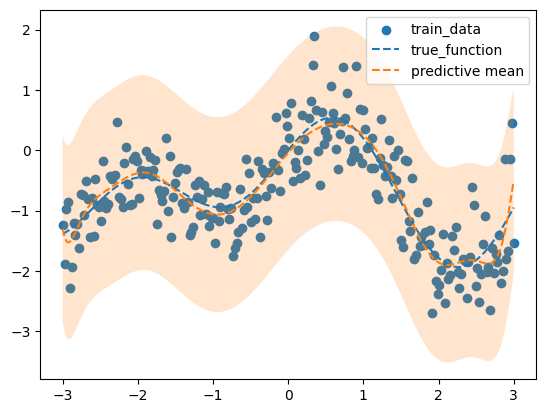

In [9]:
plt.scatter(x, y, label='train_data')
plt.plot(x_new, f_true(x_new), linestyle='--', label='true_function')
plt.plot(x_new, mean_pred, linestyle='--', label='predictive mean')

plt.fill_between(x_new, mean_pred - 2 * std_pred, mean_pred + 2 * std_pred, alpha=0.2)

plt.legend()
plt.show()

In [11]:
def log_evidence(lamb, X, y, alpha):
    '''
    Тут надо написать расчет log-evidence, через формулу, которая была в лекции
    Далее взять какой-то набор лямбд (например np.logspace(-6, 3, 160)) и оценить для каждой эту функцию
    Получится лучшая лябмда
    Вывести график log-evidence vs lambda + графики, чтобы визуально сравнить предсказания базовой модели и модели с лучшей лямбдой
    '''
    n, d = X.shape
    A = lamb * np.eye(d) + alpha * (X.T @ X)
    A_inv = np.linalg.inv(A)
    m_N = alpha * A_inv @ (X.T @ y)
    term1 = 0.5 * (d * np.log(lamb) + n * np.log(alpha) - n * np.log(2 * np.pi))
    term2 = -0.5 * (alpha * np.sum((y - X @ m_N) ** 2) + lamb * (m_N.T @ m_N))
    term3 = -0.5 * np.log(np.linalg.det(A))
    return term1 + term2 + term3



    

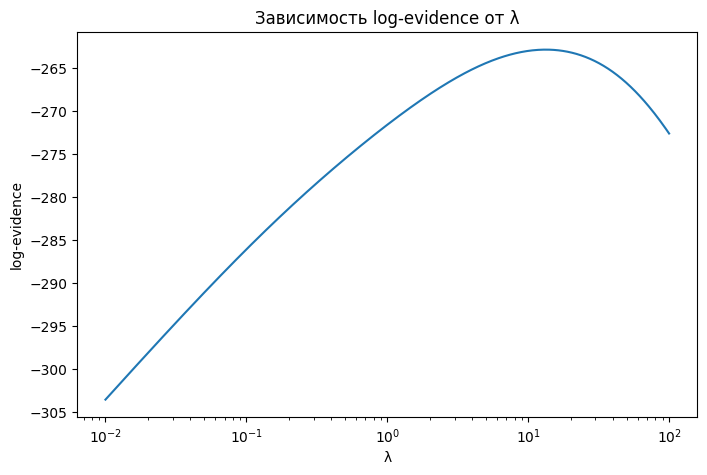

Best lambda: 13.373728582124949


In [12]:
lambs = np.logspace(-2, 2, 500)
log_evidences = [log_evidence(lamb, X, y, alpha) for lamb in lambs]
best_lamb = lambs[np.argmax(log_evidences)]

plt.figure(figsize=(8,5))
plt.plot(lambs, log_evidences)
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('log-evidence')
plt.title('Зависимость log-evidence от λ')
plt.show()

print(f'Best lambda: {best_lamb}')

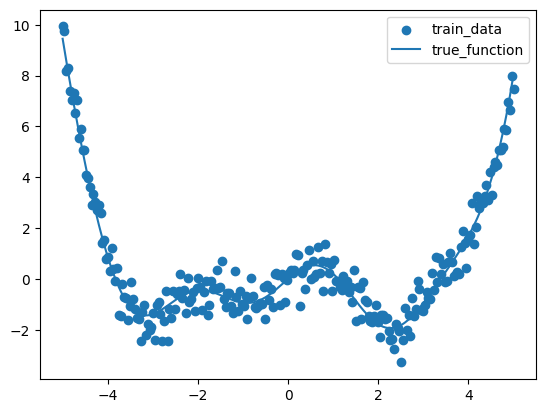

In [23]:
from sklearn.linear_model import LinearRegression
N = 250
x = np.linspace(-5, 5, N)
sigma = 0.5
y = f_true(x) + rng.normal(0, sigma, size=x.shape)
X = make_poly_features(x, degree)

base_model = LinearRegression()
base_model.fit(X, y)

plt.scatter(x, y, label='train_data')
plt.plot(x, f_true(x), label='true_function')
plt.legend()
plt.show()

In [24]:
lamb = best_lamb
A = lamb * np.eye(X.shape[1]) + alpha * X.T @ X
A_inv = np.linalg.inv(A)
m_N = alpha * A_inv @ X.T @ y

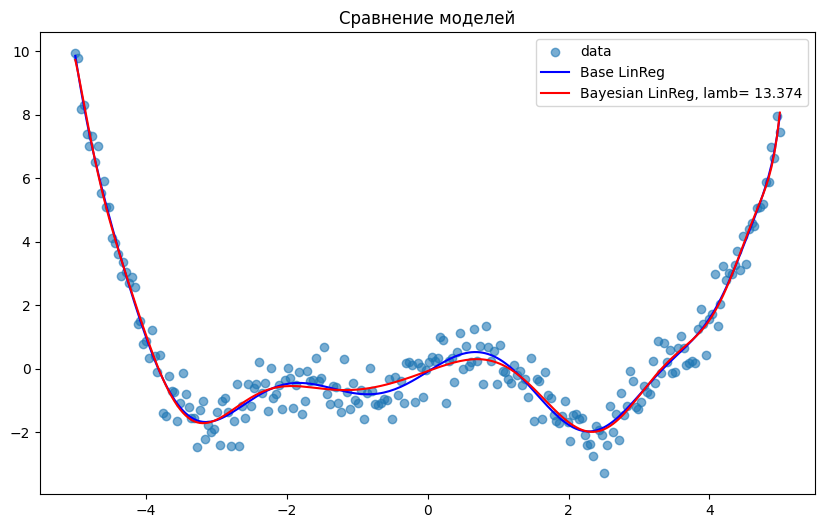

In [25]:
y_pred_base = base_model.predict(X)
y_pred_bayes = X @ m_N

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='data', alpha=0.6)
plt.plot(x, y_pred_base, label='Base LinReg', color='blue')
plt.plot(x, y_pred_bayes, label=f'Bayesian LinReg, lamb={lamb: .3f}', color='red')
plt.title('Сравнение моделей')
plt.legend()
plt.show()
